In [1]:
import ROOT, random, glob, os
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import DataSetInfo as ds
import waveLibs as wl
ROOT.gROOT.ProcessLine("gErrorIgnoreLevel = 3001;") # suppress ROOT messages

Welcome to JupyROOT 6.08/06


3001L

noiseRate 1.0
trapENFCal>1&&trapENFCal<100
Noisy Runs and rates: [ 60001001.  60001002.  60001011.  60001078.  60001121.  60001177.
  60001178.  60001184.  60001463.  60001469.  60001471.  60001477.
  60001492.  60001498.  60001692.  60001698.  60001797.  60001827.
  60001838.  60001847.  60001848.  60001881.  60001882.] [   25.    24.    28.    36.   695.    38.    41.    23.    23.    22.
    21.    22.    21.    24.  4180.    36.   789.   222.    21.   725.
    37.   224.    47.]
Run:  60001001.0
Noisy channels: [ 1106.] [ 21.]
Run:  60001002.0
Noisy channels: [ 1106.] [ 17.]
Run:  60001011.0
Noisy channels: [ 1106.  1298.] [ 20.   4.]
Run:  60001078.0
Noisy channels: [ 1144.] [ 28.]
Run:  60001121.0
Noisy channels: [ 1144.] [ 692.]
Run:  60001177.0
Noisy channels: [ 1144.] [ 28.]
Run:  60001178.0
Noisy channels: [ 1106.  1144.] [  7.  30.]
Run:  60001184.0
Noisy channels: [ 1144.] [ 18.]
Run:  60001463.0
Noisy channels: [ 1106.] [ 15.]
Run:  60001469.0
Noisy channels: [ 1106.] [ 16

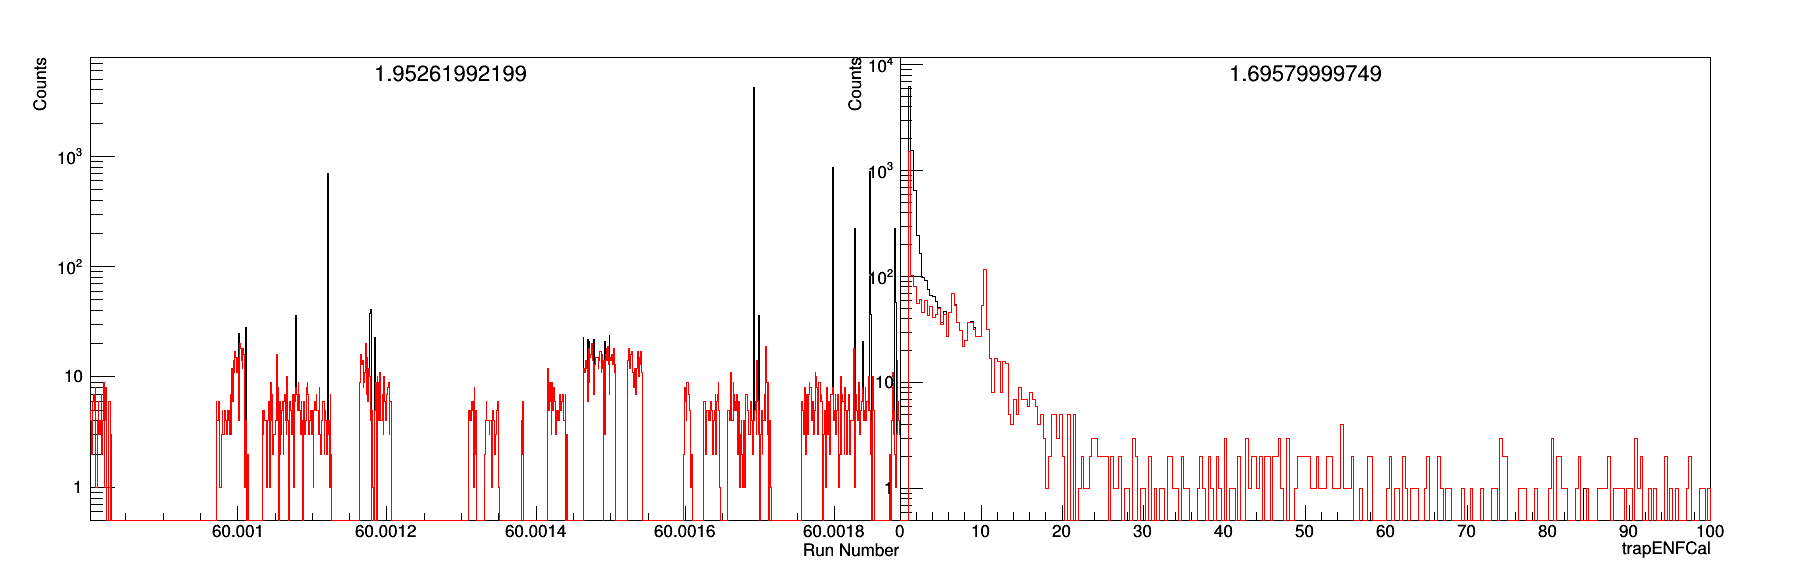

In [24]:
dsNum = 4
ROOT.gStyle.SetOptStat(0)

chList = ds.GetGoodChanList(dsNum)
nChans = len(chList)
avgRate = 100
noiseRate = float(10*(nChans)/avgRate)
print "noiseRate", noiseRate
noiseRate = 3.

bkg = ROOT.TChain("skimTree")
# bkg.Add("~/project/latskim/latSkimDS%d*.root"%dsNum)
for ch in chList:
    if ch == 1332: continue
    bkg.Add("~/project/latskim/latSkimDS%d_ch%d*.root"%(dsNum, ch))

theCut = "trapENFCal>1&&trapENFCal<100"
# theCut += "&& run!=22428  && run!=22461  && run!=22494"
# theCut += "&& channel!=614 && channel!=1298 && channel!=1124 && channel!=1302 && channel!=1330 && channel!=1332"
# theCut += "&& channel != 1208"
# theCut += "&& channel!=598 && channel!=614 && channel != 1106 && channel != 1124 && channel!=1298  &&channel!=1302  && channel!=1330  && channel!=1332"

print theCut
c = ROOT.TCanvas("c","c",1800,600)
c.Divide(2,1,0)

c.cd(1)
ROOT.gPad.SetLogy(1)
rlo, rhi = ds.dsRanges[dsNum][0], ds.dsRanges[dsNum][1]

h1 = wl.H1D(bkg,rhi-rlo,rlo,rhi,"run",theCut,"Run Number","Counts")
h1.SetLineColor(ROOT.kBlack)
h1.Draw()

runs,rates = wl.npTH1D(h1, "i")
idx = np.where(rates > 20)
print "Noisy Runs and rates:", runs[idx], rates[idx]

c.cd(2)
ROOT.gPad.SetLogy(1)
h4 = wl.H1D(bkg,300,0,100,"trapENFCal",theCut,"trapENFCal","Counts")
h4.SetLineColor(ROOT.kBlack)
h4.Draw()


hList = []
totalCut = ""
for i, run in enumerate(runs[idx]):
    hList.append(ROOT.TH1D)
    hList[i] = wl.H1D(bkg,785,550,1335,"channel",theCut+"&& run == %d"%run,"channel","Counts")
    chans,rates = wl.npTH1D(hList[i], "i")
    idx2 = np.where(rates > noiseRate)
    print "Run: ", run
    print "Noisy channels:", chans[idx2], rates[idx2]
    ChStr = ""
    NoiseCut = ""
    for ch in chans[idx2]:
        ChStr += "channel==%d||"%ch
    # When combining the channel string, remove the last 2 characters
    NoiseCut += "&&!(run==%d&&(%s))"%(run, ChStr[:-2])
    
#     print NoiseCut
    totalCut += NoiseCut
    
# print totalCut
theCut += totalCut
print theCut

h5 = wl.H1D(bkg,300,0,100,"trapENFCal",theCut,"trapENFCal","Counts")
h5.SetLineColor(ROOT.kRed)
h5.Draw("same")

c.cd(1)
ROOT.gPad.SetLogy(1)
h7 = wl.H1D(bkg,rhi-rlo,rlo,rhi,"run",theCut,"Run Number","Counts")
h7.SetLineColor(ROOT.kRed)
h7.Draw("same")

# chans,rates = wl.npTH1D(h7, "i")
# idx = np.where(rates > 1000)
# print "Noisy channels:", chans[idx], rates[idx]

c.Draw()